In [1]:
import torch

import pandas as pd

import sys

sys.path.append('..')

import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
import numpy as np
import copy

%matplotlib inline

%load_ext autoreload
%autoreload 2

from pacmagic_deeplearning.modeling.classifiers.bayesian.bnn_classifier import BNNClassifier
from pacmagic_deeplearning.modeling.classifiers.bayesian.train_utils import make_performance_uncertainty_plot

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score
from torch import nn
import seaborn as sns

torch.manual_seed(42)

2019-07-06 23:27:20: matplotlib.pyplot - switch_backend - DEBUG - Loaded backend module://ipykernel.pylab.backend_inline version unknown.


In [2]:
# X_train_raw, X_test_raw = (pd.read_csv('../data/processed/mimic/X_train_raw.csv'),
#                           pd.read_csv('../data/processed/mimic/X_test_raw.csv'))

X_train_processed, X_test_processed = (pd.read_csv('../../data/MIMIC/X_train_processed.csv'),
                          pd.read_csv('../../data/MIMIC/X_test_processed.csv'))

# X_raw = pd.concat((X_train_raw, X_test_raw))
X_processed = pd.concat((X_train_processed, X_test_processed))


y_train = pd.read_csv('../../data/MIMIC/y_train.csv', squeeze=True)
y_test = pd.read_csv('../../data/MIMIC/y_test.csv', squeeze=True)

In [3]:
outputs = []

In [6]:
bnn = BNNClassifier(hidden_dims=[64], epochs=256, verbose=True, batch_size=256, early_stopping_patience=16, class_weights=[1, 1 / y_train.mean().item()])

In [7]:
bnn.fit(X_train_processed, y_train, validate=True, X_val=X_test_processed, y_val = y_test)

DropoutEnsemble(
  (networks): ModuleList(
    (0): DropoutNet(
      (f): Sequential(
        (0): Linear(in_features=44, out_features=64, bias=True)
        (1): ReLU()
        (2): Dropout(p=0.1)
        (3): Linear(in_features=64, out_features=1, bias=True)
      )
      (nll): BCEWithLogitsLoss()
    )
    (1): DropoutNet(
      (f): Sequential(
        (0): Linear(in_features=44, out_features=64, bias=True)
        (1): ReLU()
        (2): Dropout(p=0.1)
        (3): Linear(in_features=64, out_features=1, bias=True)
      )
      (nll): BCEWithLogitsLoss()
    )
    (2): DropoutNet(
      (f): Sequential(
        (0): Linear(in_features=44, out_features=64, bias=True)
        (1): ReLU()
        (2): Dropout(p=0.1)
        (3): Linear(in_features=64, out_features=1, bias=True)
      )
      (nll): BCEWithLogitsLoss()
    )
    (3): DropoutNet(
      (f): Sequential(
        (0): Linear(in_features=44, out_features=64, bias=True)
        (1): ReLU()
        (2): Dropout(p=0.1)
   

Epoch: 0 | Total Loss: 499.7 | Uncertainty Ratio: 2.8


Epoch: 1 | Total Loss: 439.26 | Uncertainty Ratio: 2.12


Epoch: 2 | Total Loss: 419.84 | Uncertainty Ratio: 1.92


Epoch: 3 | Total Loss: 414.35 | Uncertainty Ratio: 2.07


Epoch: 4 | Total Loss: 406.6 | Uncertainty Ratio: 1.85


Epoch: 5 | Total Loss: 403.25 | Uncertainty Ratio: 2.01


Epoch: 6 | Total Loss: 400.93 | Uncertainty Ratio: 2.04


Epoch: 7 | Total Loss: 397.64 | Uncertainty Ratio: 2.0


Epoch: 8 | Total Loss: 395.77 | Uncertainty Ratio: 1.98


Epoch: 9 | Total Loss: 401.38 | Uncertainty Ratio: 2.15


Epoch: 10 | Total Loss: 391.71 | Uncertainty Ratio: 2.07


Epoch: 11 | Total Loss: 395.65 | Uncertainty Ratio: 2.07


Epoch: 12 | Total Loss: 389.72 | Uncertainty Ratio: 2.27


Epoch: 13 | Total Loss: 386.54 | Uncertainty Ratio: 2.27


Epoch: 14 | Total Loss: 385.21 | Uncertainty Ratio: 2.27


Epoch: 15 | Total Loss: 383.48 | Uncertainty Ratio: 2.29


Epoch: 16 | Total Loss: 380.95 | Uncertainty Ratio: 2.36


Epoch: 17 | Total Loss: 379.84 | Uncertainty Ratio: 2.35


Epoch: 18 | Total Loss: 380.2 | Uncertainty Ratio: 2.43


Epoch: 19 | Total Loss: 382.94 | Uncertainty Ratio: 2.48


Epoch: 20 | Total Loss: 376.44 | Uncertainty Ratio: 2.53


Epoch: 21 | Total Loss: 377.27 | Uncertainty Ratio: 2.58


Epoch: 22 | Total Loss: 374.67 | Uncertainty Ratio: 2.4


Epoch: 23 | Total Loss: 371.95 | Uncertainty Ratio: 2.34


Epoch: 24 | Total Loss: 369.67 | Uncertainty Ratio: 2.48


Epoch: 25 | Total Loss: 370.08 | Uncertainty Ratio: 2.48


Epoch: 26 | Total Loss: 369.26 | Uncertainty Ratio: 2.68


Epoch: 27 | Total Loss: 366.86 | Uncertainty Ratio: 2.34


Epoch: 28 | Total Loss: 366.51 | Uncertainty Ratio: 2.58


Epoch: 29 | Total Loss: 366.4 | Uncertainty Ratio: 2.51


Epoch: 30 | Total Loss: 364.37 | Uncertainty Ratio: 2.46


Epoch: 31 | Total Loss: 364.32 | Uncertainty Ratio: 2.42


Epoch: 32 | Total Loss: 362.61 | Uncertainty Ratio: 2.39


Epoch: 33 | Total Loss: 360.95 | Uncertainty Ratio: 2.38


Epoch: 34 | Total Loss: 363.17 | Uncertainty Ratio: 2.74


Epoch: 35 | Total Loss: 363.47 | Uncertainty Ratio: 2.49


Epoch: 36 | Total Loss: 356.31 | Uncertainty Ratio: 2.51


Epoch: 37 | Total Loss: 364.7 | Uncertainty Ratio: 2.73


Epoch: 38 | Total Loss: 355.94 | Uncertainty Ratio: 2.47


Epoch: 39 | Total Loss: 356.83 | Uncertainty Ratio: 2.46


Epoch: 40 | Total Loss: 354.82 | Uncertainty Ratio: 2.33


Epoch: 41 | Total Loss: 354.22 | Uncertainty Ratio: 2.54


Epoch: 42 | Total Loss: 351.59 | Uncertainty Ratio: 2.44


Epoch: 43 | Total Loss: 354.63 | Uncertainty Ratio: 2.57


Epoch: 44 | Total Loss: 353.05 | Uncertainty Ratio: 2.58


Epoch: 45 | Total Loss: 351.91 | Uncertainty Ratio: 2.65


Epoch: 46 | Total Loss: 353.51 | Uncertainty Ratio: 2.34


Epoch: 47 | Total Loss: 350.06 | Uncertainty Ratio: 2.54


Epoch: 48 | Total Loss: 351.13 | Uncertainty Ratio: 2.54


Epoch: 49 | Total Loss: 349.89 | Uncertainty Ratio: 2.52


Epoch: 50 | Total Loss: 349.46 | Uncertainty Ratio: 2.51


Epoch: 51 | Total Loss: 348.05 | Uncertainty Ratio: 2.57


Epoch: 52 | Total Loss: 347.52 | Uncertainty Ratio: 2.64


Epoch: 53 | Total Loss: 347.84 | Uncertainty Ratio: 2.62


Epoch: 54 | Total Loss: 344.55 | Uncertainty Ratio: 2.5


Epoch: 55 | Total Loss: 344.17 | Uncertainty Ratio: 2.38


Epoch: 56 | Total Loss: 345.51 | Uncertainty Ratio: 2.69


Epoch: 57 | Total Loss: 349.79 | Uncertainty Ratio: 2.45


Epoch: 58 | Total Loss: 348.96 | Uncertainty Ratio: 2.28


Epoch: 59 | Total Loss: 353.12 | Uncertainty Ratio: 2.27


Epoch: 60 | Total Loss: 343.74 | Uncertainty Ratio: 2.51


Epoch: 61 | Total Loss: 340.97 | Uncertainty Ratio: 2.41


Epoch: 62 | Total Loss: 343.34 | Uncertainty Ratio: 2.67


Epoch: 63 | Total Loss: 344.04 | Uncertainty Ratio: 2.58


Epoch: 64 | Total Loss: 340.89 | Uncertainty Ratio: 2.59


Epoch: 65 | Total Loss: 349.02 | Uncertainty Ratio: 2.62


Epoch: 66 | Total Loss: 339.43 | Uncertainty Ratio: 2.48


Epoch: 67 | Total Loss: 343.79 | Uncertainty Ratio: 2.59


Epoch: 68 | Total Loss: 339.96 | Uncertainty Ratio: 2.48


Epoch: 69 | Total Loss: 341.71 | Uncertainty Ratio: 2.41


Epoch: 70 | Total Loss: 336.74 | Uncertainty Ratio: 2.38


Epoch: 71 | Total Loss: 340.73 | Uncertainty Ratio: 2.42


Epoch: 72 | Total Loss: 338.12 | Uncertainty Ratio: 2.37


Epoch: 73 | Total Loss: 336.67 | Uncertainty Ratio: 2.55


Epoch: 74 | Total Loss: 338.58 | Uncertainty Ratio: 2.5


Epoch: 75 | Total Loss: 336.65 | Uncertainty Ratio: 2.49


Epoch: 76 | Total Loss: 342.79 | Uncertainty Ratio: 2.74


Epoch: 77 | Total Loss: 336.37 | Uncertainty Ratio: 2.42


Epoch: 78 | Total Loss: 336.53 | Uncertainty Ratio: 2.37


Epoch: 79 | Total Loss: 336.73 | Uncertainty Ratio: 2.37


Epoch: 80 | Total Loss: 337.68 | Uncertainty Ratio: 2.48


Epoch: 81 | Total Loss: 345.33 | Uncertainty Ratio: 2.79


Epoch: 82 | Total Loss: 336.26 | Uncertainty Ratio: 2.44


Epoch: 83 | Total Loss: 337.23 | Uncertainty Ratio: 2.27


Epoch: 84 | Total Loss: 336.15 | Uncertainty Ratio: 2.5


Epoch: 85 | Total Loss: 334.17 | Uncertainty Ratio: 2.45


Epoch: 86 | Total Loss: 335.1 | Uncertainty Ratio: 2.43


Epoch: 87 | Total Loss: 334.08 | Uncertainty Ratio: 2.37


Epoch: 88 | Total Loss: 339.13 | Uncertainty Ratio: 2.63


Epoch: 89 | Total Loss: 332.86 | Uncertainty Ratio: 2.37


Epoch: 90 | Total Loss: 332.14 | Uncertainty Ratio: 2.43


Epoch: 91 | Total Loss: 331.7 | Uncertainty Ratio: 2.33


Epoch: 92 | Total Loss: 331.75 | Uncertainty Ratio: 2.32


Epoch: 93 | Total Loss: 331.53 | Uncertainty Ratio: 2.45


Epoch: 94 | Total Loss: 332.1 | Uncertainty Ratio: 2.38


Epoch: 95 | Total Loss: 335.05 | Uncertainty Ratio: 2.5


Epoch: 96 | Total Loss: 330.85 | Uncertainty Ratio: 2.37


Epoch: 97 | Total Loss: 331.92 | Uncertainty Ratio: 2.34


Epoch: 98 | Total Loss: 332.5 | Uncertainty Ratio: 2.17


Epoch: 99 | Total Loss: 332.14 | Uncertainty Ratio: 2.33


Epoch: 100 | Total Loss: 333.66 | Uncertainty Ratio: 2.44


Epoch: 101 | Total Loss: 330.06 | Uncertainty Ratio: 2.28


Epoch: 102 | Total Loss: 331.01 | Uncertainty Ratio: 2.33


Epoch: 103 | Total Loss: 330.7 | Uncertainty Ratio: 2.39


Epoch: 104 | Total Loss: 332.94 | Uncertainty Ratio: 2.59


Epoch: 105 | Total Loss: 331.11 | Uncertainty Ratio: 2.68


Epoch: 106 | Total Loss: 328.71 | Uncertainty Ratio: 2.43


Epoch: 107 | Total Loss: 332.99 | Uncertainty Ratio: 2.59


Epoch: 108 | Total Loss: 326.79 | Uncertainty Ratio: 2.18


Epoch: 109 | Total Loss: 329.38 | Uncertainty Ratio: 2.54


Epoch: 110 | Total Loss: 328.88 | Uncertainty Ratio: 2.29


Epoch: 111 | Total Loss: 328.66 | Uncertainty Ratio: 2.47


Epoch: 112 | Total Loss: 328.08 | Uncertainty Ratio: 2.32


Epoch: 113 | Total Loss: 329.89 | Uncertainty Ratio: 2.16


Epoch: 114 | Total Loss: 328.16 | Uncertainty Ratio: 2.26


Epoch: 115 | Total Loss: 328.78 | Uncertainty Ratio: 2.39


Epoch: 116 | Total Loss: 326.49 | Uncertainty Ratio: 2.19


Epoch: 117 | Total Loss: 326.63 | Uncertainty Ratio: 2.26


Epoch: 118 | Total Loss: 328.87 | Uncertainty Ratio: 2.48


Epoch: 119 | Total Loss: 331.54 | Uncertainty Ratio: 2.53


Epoch: 120 | Total Loss: 325.55 | Uncertainty Ratio: 2.23


Epoch: 121 | Total Loss: 328.83 | Uncertainty Ratio: 2.38


Epoch: 122 | Total Loss: 329.18 | Uncertainty Ratio: 2.43


Epoch: 123 | Total Loss: 333.32 | Uncertainty Ratio: 2.52


Epoch: 124 | Total Loss: 322.51 | Uncertainty Ratio: 2.1


Epoch: 125 | Total Loss: 327.01 | Uncertainty Ratio: 2.27


Epoch: 126 | Total Loss: 323.46 | Uncertainty Ratio: 2.44


Epoch: 127 | Total Loss: 328.55 | Uncertainty Ratio: 2.39


Epoch: 128 | Total Loss: 322.87 | Uncertainty Ratio: 2.28


Epoch: 129 | Total Loss: 329.59 | Uncertainty Ratio: 2.23


Epoch: 130 | Total Loss: 325.45 | Uncertainty Ratio: 2.17


Epoch: 131 | Total Loss: 328.13 | Uncertainty Ratio: 2.27


Epoch: 132 | Total Loss: 325.16 | Uncertainty Ratio: 2.16


Epoch: 133 | Total Loss: 321.05 | Uncertainty Ratio: 2.13


Epoch: 134 | Total Loss: 324.5 | Uncertainty Ratio: 2.44


Epoch: 135 | Total Loss: 322.93 | Uncertainty Ratio: 2.31


Epoch: 136 | Total Loss: 326.19 | Uncertainty Ratio: 2.29


Epoch: 137 | Total Loss: 322.62 | Uncertainty Ratio: 2.21


Epoch: 138 | Total Loss: 330.01 | Uncertainty Ratio: 2.46


Epoch: 139 | Total Loss: 328.79 | Uncertainty Ratio: 2.49


Epoch: 140 | Total Loss: 324.73 | Uncertainty Ratio: 2.15


Epoch: 141 | Total Loss: 326.64 | Uncertainty Ratio: 2.42


Epoch: 142 | Total Loss: 326.43 | Uncertainty Ratio: 2.36


Epoch: 143 | Total Loss: 320.17 | Uncertainty Ratio: 2.3


Epoch: 144 | Total Loss: 326.3 | Uncertainty Ratio: 2.34


Epoch: 145 | Total Loss: 323.95 | Uncertainty Ratio: 2.25


Epoch: 146 | Total Loss: 327.0 | Uncertainty Ratio: 2.32


Epoch: 147 | Total Loss: 323.62 | Uncertainty Ratio: 2.3


Epoch: 148 | Total Loss: 328.86 | Uncertainty Ratio: 2.29


Epoch: 149 | Total Loss: 318.29 | Uncertainty Ratio: 2.13


Epoch: 150 | Total Loss: 321.21 | Uncertainty Ratio: 2.1


Epoch: 151 | Total Loss: 318.85 | Uncertainty Ratio: 2.27


Epoch: 152 | Total Loss: 331.64 | Uncertainty Ratio: 2.4


Epoch: 153 | Total Loss: 322.64 | Uncertainty Ratio: 2.19


Epoch: 154 | Total Loss: 319.64 | Uncertainty Ratio: 2.13


Epoch: 155 | Total Loss: 321.39 | Uncertainty Ratio: 2.37


Epoch: 156 | Total Loss: 321.41 | Uncertainty Ratio: 2.23


Epoch: 157 | Total Loss: 322.87 | Uncertainty Ratio: 2.27


Epoch: 158 | Total Loss: 320.44 | Uncertainty Ratio: 2.08


Epoch: 159 | Total Loss: 322.79 | Uncertainty Ratio: 2.33


Epoch: 160 | Total Loss: 320.25 | Uncertainty Ratio: 2.17


Epoch: 161 | Total Loss: 333.38 | Uncertainty Ratio: 2.29


Epoch: 162 | Total Loss: 327.08 | Uncertainty Ratio: 2.38


Epoch: 163 | Total Loss: 319.18 | Uncertainty Ratio: 2.31


Epoch: 164 | Total Loss: 319.87 | Uncertainty Ratio: 2.11


Epoch: 165 | Total Loss: 320.85 | Uncertainty Ratio: 2.0
Loading saved parameters..


DropoutEnsemble(
  (networks): ModuleList(
    (0): DropoutNet(
      (f): Sequential(
        (0): Linear(in_features=44, out_features=64, bias=True)
        (1): ReLU()
        (2): Dropout(p=0.1)
        (3): Linear(in_features=64, out_features=1, bias=True)
      )
      (nll): BCEWithLogitsLoss()
    )
    (1): DropoutNet(
      (f): Sequential(
        (0): Linear(in_features=44, out_features=64, bias=True)
        (1): ReLU()
        (2): Dropout(p=0.1)
        (3): Linear(in_features=64, out_features=1, bias=True)
      )
      (nll): BCEWithLogitsLoss()
    )
    (2): DropoutNet(
      (f): Sequential(
        (0): Linear(in_features=44, out_features=64, bias=True)
        (1): ReLU()
        (2): Dropout(p=0.1)
        (3): Linear(in_features=64, out_features=1, bias=True)
      )
      (nll): BCEWithLogitsLoss()
    )
    (3): DropoutNet(
      (f): Sequential(
        (0): Linear(in_features=44, out_features=64, bias=True)
        (1): ReLU()
        (2): Dropout(p=0.1)
   

In [11]:
uncs = bnn.get_uncertainties(X_test_processed)

2019-07-06 23:35:58: pacmagic_deeplearning.modeling.classifiers.bayesian.bnn_classifier - get_raw_outputs - INFO - Forwarding with 64 samples.


In [10]:
preds = bnn.predict_proba(X_test_processed)[:, 1]

2019-07-06 23:35:57: pacmagic_deeplearning.modeling.classifiers.bayesian.bnn_classifier - get_raw_outputs - INFO - Forwarding with 64 samples.


/Users/david/miniconda3/envs/py37/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  return getattr(obj, method)(*args, **kwds)


2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>

2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Luxi Serif' (luxirr.ttf) normal normal regular normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Gurmukhi MN' (Gurmukhi MN.ttc) normal normal 400 normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Luxi Mono' (luximr.ttf) normal normal regular normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'LingWai SC' (LingWaiSC-Medium.otf) normal normal medium normal>) = 10.145
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Sinhala Sangam MN' (Sinhala Sangam MN.ttc) normal normal 400 normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Montserrat ExtraBold' (Montserrat-ExtraBold.ttf) normal normal bold norma

2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'PCMyungjo' (PCmyoungjo.ttf) normal normal regular normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Italic.ttf) italic normal 400 normal>) = 11.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Regular.otf) normal normal regular normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Telugu Sangam MN' (Telugu Sangam MN.ttc) normal normal 400 normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Apple SD Gothic Neo' (AppleSDGothicNeo.ttc) normal normal regular normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF Compact Text' (SFCompa

2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Geeza Pro' (GeezaPro.ttc) normal normal regular normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Sathu' (Sathu.ttf) normal normal 400 normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Comic Sans MS' (Comic Sans MS.ttf) normal normal 400 normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'System Font' (SFNSDisplay-HeavyItalic.otf) italic normal heavy normal>) = 11.43
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Avenir' (Avenir.ttc) normal normal book normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Songti SC' (Songti.ttc) normal normal black normal>) = 10.525
2019-07-06 23:37:27: matplotli

2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Heavy.otf) normal normal heavy normal>) = 10.43
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Montserrat ExtraLight' (Montserrat-ExtraLightItalic.ttf) italic normal light normal>) = 11.24
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'System Font' (SFNSText.ttf) normal normal 400 normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Chalkboard SE' (ChalkboardSE.ttc) normal normal light normal>) = 10.24
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Serto Batnan' (SyrCOMBatnan.otf) normal normal 400 normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'PT Serif' (PTSerif.ttc) normal norm

2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Nanum Myeongjo' (NanumMyeongjo.ttc) normal normal 400 normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Kailasa' (Kailasa.ttc) normal normal regular normal>) = 10.05
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Bitstream Vera Serif' (VeraSeBd.ttf) normal normal bold normal>) = 10.335
2019-07-06 23:37:27: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF Compact Text' (SFCompactText-MediumItalic.otf) italic normal medium normal>) = 11.145
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W5.ttc) normal normal 700 normal>) = 10.335
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman Bold Italic.ttf

2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Charter' (Charter.ttc) normal normal roman normal>) = 10.145
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W6.ttc) normal normal 700 normal>) = 10.335
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Medium.otf) normal normal medium normal>) = 10.145
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Damascus' (Damascus.ttc) normal normal regular normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Apple Chancery' (Apple Chancery.ttf) normal normal 400 normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'YuKyokasho Yoko' (Kyokasho.ttc) normal normal medium normal

2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Bodoni 72 Oldstyle' (Bodoni 72 OS.ttc) normal normal book normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Bodoni 72 Smallcaps' (Bodoni 72 Smallcaps Book.ttf) normal normal book normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Avenir Next Condensed' (Avenir Next Condensed.ttc) normal normal bold condensed>) = 10.535
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W7.ttc) normal normal 700 normal>) = 10.335
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'SignPainter' (SignPainter.ttc) normal normal 400 normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Montserrat Medium' (Montse

2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Regular.otf) normal normal regular normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'STHeiti' (STHEITI.ttf) normal normal 400 normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Tsukushi B Round Gothic' (TsukushiBMaruGothic.ttc) normal normal regular normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Bodoni 72' (Bodoni 72.ttc) normal normal book normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Roboto Light' (Roboto-LightItalic.ttf) italic normal light normal>) = 11.24
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Se

2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Khmer MN' (Khmer MN.ttc) normal normal 400 normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Bodoni Ornaments' (Bodoni Ornaments.ttf) normal normal 400 normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'AppleMyungjo' (AppleMyungjo.ttf) normal normal regular normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Microsoft Sans Serif' (Microsoft Sans Serif.ttf) normal normal 400 normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Luxi Serif' (luxirri.ttf) oblique normal 400 normal>) = 11.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.Aqua Kana' (AquaKana.ttc) normal normal 400 normal>) = 10.05
20

2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow Italic.ttf) italic normal 400 condensed>) = 11.25
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'American Typewriter' (AmericanTypewriter.ttc) normal normal 400 normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Arial' (Arial Bold Italic.ttf) italic normal bold normal>) = 7.698636363636363
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W9.ttc) normal normal 700 normal>) = 10.335
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'New Peninim MT' (NewPeninimMT.ttc) normal normal 400 normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Kaiti SC' (Kaiti.ttc) normal normal re

2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'System Font' (SFNSDisplay-BoldItalic.otf) italic normal bold normal>) = 11.335
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Montserrat Light' (Montserrat-Light.ttf) normal normal light normal>) = 10.24
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDReg.otf) normal normal regular normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Oriya Sangam MN' (Oriya Sangam MN.ttc) normal normal 400 normal>) = 10.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Luxi Sans' (luxisri.ttf) oblique normal 400 normal>) = 11.05
2019-07-06 23:37:28: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'East Syriac Ctesiphon' (SyrCOMCtesiphon.otf) norm

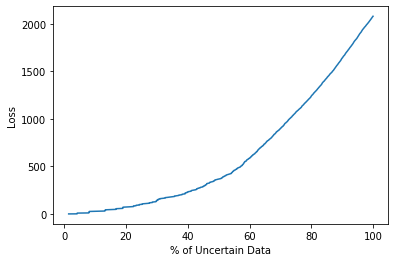

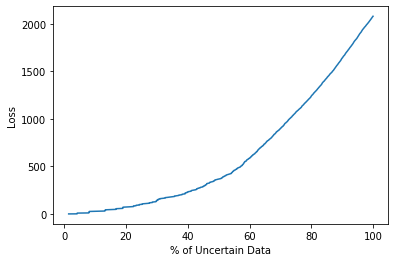

In [12]:
make_performance_uncertainty_plot(y_test, preds, uncs, 'Loss', performance_fn_args={'reduction': 'sum'})

In [42]:
bnn_confident = BNNClassifier(bnn_type='mc_dropout', hidden_dims=[128, 128], epochs=256, verbose=True, 
                              batch_size=256, early_stopping_patience=16, class_weights=[1, 3 / y_train.mean().item()])


bnn_diffident = BNNClassifier(bnn_type='mc_dropout', hidden_dims=[128, 128], epochs=256, verbose=True, 
                              batch_size=256, early_stopping_patience=16, class_weights=[1, (1/3) / y_train.mean().item()])

In [43]:
bnn_confident.fit(X_train_processed, y_train, validate=True, X_val=X_test_processed, y_val = y_test)
bnn_diffident.fit(X_train_processed, y_train, validate=True, X_val=X_test_processed, y_val = y_test)

DropoutNet(
  (f): Sequential(
    (0): Linear(in_features=44, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1)
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
  (nll): BCEWithLogitsLoss()
)


Epoch: 0 | Total Loss: 732.59 | Uncertainty Ratio: 0.61


Epoch: 1 | Total Loss: 677.87 | Uncertainty Ratio: 0.59


Epoch: 2 | Total Loss: 695.31 | Uncertainty Ratio: 0.65


Epoch: 3 | Total Loss: 672.23 | Uncertainty Ratio: 0.64


Epoch: 4 | Total Loss: 643.16 | Uncertainty Ratio: 0.6


Epoch: 5 | Total Loss: 641.45 | Uncertainty Ratio: 0.67


Epoch: 6 | Total Loss: 645.3 | Uncertainty Ratio: 0.67


Epoch: 7 | Total Loss: 642.43 | Uncertainty Ratio: 0.62


Epoch: 8 | Total Loss: 649.96 | Uncertainty Ratio: 0.53


Epoch: 9 | Total Loss: 608.12 | Uncertainty Ratio: 0.58


Epoch: 10 | Total Loss: 606.73 | Uncertainty Ratio: 0.57


Epoch: 11 | Total Loss: 603.55 | Uncertainty Ratio: 0.49


Epoch: 12 | Total Loss: 608.81 | Uncertainty Ratio: 0.51


Epoch: 13 | Total Loss: 596.34 | Uncertainty Ratio: 0.51


Epoch: 14 | Total Loss: 588.95 | Uncertainty Ratio: 0.53


Epoch: 15 | Total Loss: 595.7 | Uncertainty Ratio: 0.64


Epoch: 16 | Total Loss: 588.26 | Uncertainty Ratio: 0.63


Epoch: 17 | Total Loss: 577.31 | Uncertainty Ratio: 0.63


Epoch: 18 | Total Loss: 598.15 | Uncertainty Ratio: 0.58


Epoch: 19 | Total Loss: 607.55 | Uncertainty Ratio: 0.77


Epoch: 20 | Total Loss: 585.47 | Uncertainty Ratio: 0.58


Epoch: 21 | Total Loss: 585.28 | Uncertainty Ratio: 0.69


Epoch: 22 | Total Loss: 571.85 | Uncertainty Ratio: 0.67


Epoch: 23 | Total Loss: 569.35 | Uncertainty Ratio: 0.66


Epoch: 24 | Total Loss: 576.26 | Uncertainty Ratio: 0.78


Epoch: 25 | Total Loss: 565.94 | Uncertainty Ratio: 0.77


Epoch: 26 | Total Loss: 610.31 | Uncertainty Ratio: 0.9


Epoch: 27 | Total Loss: 558.29 | Uncertainty Ratio: 0.79


Epoch: 28 | Total Loss: 573.17 | Uncertainty Ratio: 0.8


Epoch: 29 | Total Loss: 571.56 | Uncertainty Ratio: 0.85


Epoch: 30 | Total Loss: 584.32 | Uncertainty Ratio: 0.91


Epoch: 31 | Total Loss: 584.31 | Uncertainty Ratio: 0.99


Epoch: 32 | Total Loss: 582.19 | Uncertainty Ratio: 1.04


Epoch: 33 | Total Loss: 574.44 | Uncertainty Ratio: 1.1


Epoch: 34 | Total Loss: 590.33 | Uncertainty Ratio: 0.91


Epoch: 35 | Total Loss: 564.23 | Uncertainty Ratio: 1.09


Epoch: 36 | Total Loss: 574.26 | Uncertainty Ratio: 1.25


Epoch: 37 | Total Loss: 567.12 | Uncertainty Ratio: 1.26


Epoch: 38 | Total Loss: 552.83 | Uncertainty Ratio: 1.22


Epoch: 39 | Total Loss: 577.29 | Uncertainty Ratio: 1.35


Epoch: 40 | Total Loss: 575.49 | Uncertainty Ratio: 1.35


Epoch: 41 | Total Loss: 602.94 | Uncertainty Ratio: 1.28


Epoch: 42 | Total Loss: 567.0 | Uncertainty Ratio: 1.25


Epoch: 43 | Total Loss: 607.6 | Uncertainty Ratio: 1.41


Epoch: 44 | Total Loss: 606.89 | Uncertainty Ratio: 1.44


Epoch: 45 | Total Loss: 630.68 | Uncertainty Ratio: 1.49


Epoch: 46 | Total Loss: 582.14 | Uncertainty Ratio: 1.55


Epoch: 47 | Total Loss: 588.64 | Uncertainty Ratio: 1.5


Epoch: 48 | Total Loss: 618.79 | Uncertainty Ratio: 1.71


Epoch: 49 | Total Loss: 560.23 | Uncertainty Ratio: 1.36


Epoch: 50 | Total Loss: 598.4 | Uncertainty Ratio: 1.58


Epoch: 51 | Total Loss: 708.89 | Uncertainty Ratio: 1.9


Epoch: 52 | Total Loss: 613.86 | Uncertainty Ratio: 1.76


Epoch: 53 | Total Loss: 577.49 | Uncertainty Ratio: 1.37


Epoch: 54 | Total Loss: 651.19 | Uncertainty Ratio: 1.84
Loading saved parameters..
DropoutNet(
  (f): Sequential(
    (0): Linear(in_features=44, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1)
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
  (nll): BCEWithLogitsLoss()
)


Epoch: 0 | Total Loss: 247.29 | Uncertainty Ratio: 1.02


Epoch: 1 | Total Loss: 219.33 | Uncertainty Ratio: 1.66


Epoch: 2 | Total Loss: 221.81 | Uncertainty Ratio: 2.03


Epoch: 3 | Total Loss: 213.87 | Uncertainty Ratio: 2.24


Epoch: 4 | Total Loss: 213.22 | Uncertainty Ratio: 2.5


Epoch: 5 | Total Loss: 207.96 | Uncertainty Ratio: 2.04


Epoch: 6 | Total Loss: 207.21 | Uncertainty Ratio: 2.12


Epoch: 7 | Total Loss: 202.04 | Uncertainty Ratio: 3.04


Epoch: 8 | Total Loss: 199.37 | Uncertainty Ratio: 2.88


Epoch: 9 | Total Loss: 197.15 | Uncertainty Ratio: 2.41


Epoch: 10 | Total Loss: 194.03 | Uncertainty Ratio: 2.85


Epoch: 11 | Total Loss: 194.95 | Uncertainty Ratio: 3.01


Epoch: 12 | Total Loss: 194.54 | Uncertainty Ratio: 2.78


Epoch: 13 | Total Loss: 191.88 | Uncertainty Ratio: 3.0


Epoch: 14 | Total Loss: 192.39 | Uncertainty Ratio: 2.49


Epoch: 15 | Total Loss: 200.24 | Uncertainty Ratio: 2.51


Epoch: 16 | Total Loss: 191.66 | Uncertainty Ratio: 2.74


Epoch: 17 | Total Loss: 189.47 | Uncertainty Ratio: 2.94


Epoch: 18 | Total Loss: 205.58 | Uncertainty Ratio: 4.06


Epoch: 19 | Total Loss: 193.74 | Uncertainty Ratio: 3.7


Epoch: 20 | Total Loss: 185.31 | Uncertainty Ratio: 2.78


Epoch: 21 | Total Loss: 184.14 | Uncertainty Ratio: 2.89


Epoch: 22 | Total Loss: 190.58 | Uncertainty Ratio: 2.12


Epoch: 23 | Total Loss: 183.96 | Uncertainty Ratio: 3.05


Epoch: 24 | Total Loss: 192.05 | Uncertainty Ratio: 2.32


Epoch: 25 | Total Loss: 190.53 | Uncertainty Ratio: 2.53


Epoch: 26 | Total Loss: 183.34 | Uncertainty Ratio: 2.56


Epoch: 27 | Total Loss: 184.44 | Uncertainty Ratio: 2.98


Epoch: 28 | Total Loss: 184.16 | Uncertainty Ratio: 2.33


Epoch: 29 | Total Loss: 179.82 | Uncertainty Ratio: 2.91


Epoch: 30 | Total Loss: 183.69 | Uncertainty Ratio: 2.42


Epoch: 31 | Total Loss: 185.72 | Uncertainty Ratio: 3.09


Epoch: 32 | Total Loss: 180.75 | Uncertainty Ratio: 2.35


Epoch: 33 | Total Loss: 178.75 | Uncertainty Ratio: 2.76


Epoch: 34 | Total Loss: 180.07 | Uncertainty Ratio: 2.76


Epoch: 35 | Total Loss: 181.75 | Uncertainty Ratio: 2.58


Epoch: 36 | Total Loss: 179.97 | Uncertainty Ratio: 2.22


Epoch: 37 | Total Loss: 177.44 | Uncertainty Ratio: 2.92


Epoch: 38 | Total Loss: 183.54 | Uncertainty Ratio: 2.18


Epoch: 39 | Total Loss: 181.47 | Uncertainty Ratio: 3.24


Epoch: 40 | Total Loss: 178.23 | Uncertainty Ratio: 2.49


Epoch: 41 | Total Loss: 174.64 | Uncertainty Ratio: 2.54


Epoch: 42 | Total Loss: 177.14 | Uncertainty Ratio: 2.82


Epoch: 43 | Total Loss: 176.34 | Uncertainty Ratio: 2.68


Epoch: 44 | Total Loss: 176.55 | Uncertainty Ratio: 2.51


Epoch: 45 | Total Loss: 175.81 | Uncertainty Ratio: 2.91


Epoch: 46 | Total Loss: 178.8 | Uncertainty Ratio: 2.93


Epoch: 47 | Total Loss: 175.57 | Uncertainty Ratio: 3.06


Epoch: 48 | Total Loss: 171.62 | Uncertainty Ratio: 2.58


Epoch: 49 | Total Loss: 176.66 | Uncertainty Ratio: 2.51


Epoch: 50 | Total Loss: 183.16 | Uncertainty Ratio: 3.14


Epoch: 51 | Total Loss: 178.21 | Uncertainty Ratio: 2.75


Epoch: 52 | Total Loss: 175.86 | Uncertainty Ratio: 2.47


Epoch: 53 | Total Loss: 182.31 | Uncertainty Ratio: 3.23


Epoch: 54 | Total Loss: 176.81 | Uncertainty Ratio: 2.31


Epoch: 55 | Total Loss: 177.24 | Uncertainty Ratio: 2.58


Epoch: 56 | Total Loss: 173.98 | Uncertainty Ratio: 2.48


Epoch: 57 | Total Loss: 172.66 | Uncertainty Ratio: 2.4


Epoch: 58 | Total Loss: 177.51 | Uncertainty Ratio: 2.48


Epoch: 59 | Total Loss: 190.47 | Uncertainty Ratio: 3.49


Epoch: 60 | Total Loss: 181.71 | Uncertainty Ratio: 2.33


Epoch: 61 | Total Loss: 175.78 | Uncertainty Ratio: 2.84


Epoch: 62 | Total Loss: 188.78 | Uncertainty Ratio: 3.31


Epoch: 63 | Total Loss: 181.63 | Uncertainty Ratio: 3.09


Epoch: 64 | Total Loss: 176.64 | Uncertainty Ratio: 2.36
Loading saved parameters..


DropoutNet(
  (f): Sequential(
    (0): Linear(in_features=44, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.1)
    (3): Linear(in_features=128, out_features=128, bias=True)
    (4): ReLU()
    (5): Dropout(p=0.1)
    (6): Linear(in_features=128, out_features=1, bias=True)
  )
  (nll): BCEWithLogitsLoss()
)

In [44]:
preds = bnn.predict_proba(X_test_processed)[:, 1]

2019-07-06 14:03:23: pacmagic_deeplearning.modeling.classifiers.bayesian.bnn_classifier - get_raw_outputs - INFO - Forwarding with 64 samples.


In [45]:
uncertainties = bnn_confident.predict_proba(X_test_processed)[:, 1] - bnn_diffident.predict_proba(X_test_processed)[:, 1]

2019-07-06 14:03:23: pacmagic_deeplearning.modeling.classifiers.bayesian.bnn_classifier - get_raw_outputs - INFO - Forwarding with 64 samples.
2019-07-06 14:03:24: pacmagic_deeplearning.modeling.classifiers.bayesian.bnn_classifier - get_raw_outputs - INFO - Forwarding with 64 samples.


Text(0.5, 0, 'Prediction')

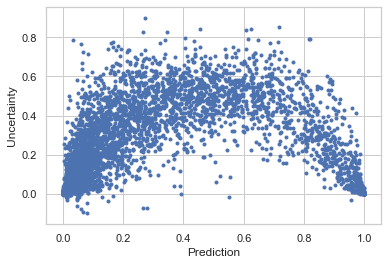

In [46]:
plt.scatter(preds, uncertainties, marker='.')
plt.ylabel('Uncertainty')
plt.xlabel('Prediction')

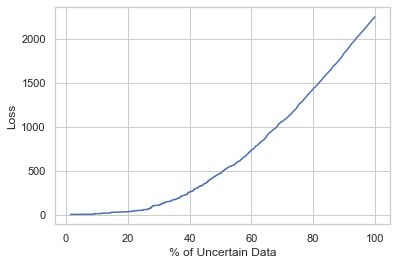

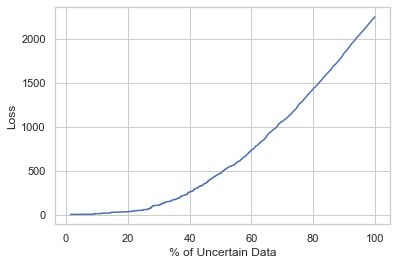

In [47]:
make_performance_uncertainty_plot(y_test.values.astype(int), preds, uncertainties, 'Loss', performance_fn_args={'reduction': 'sum'})

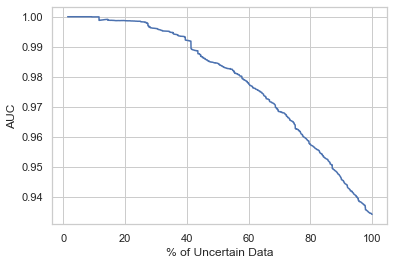

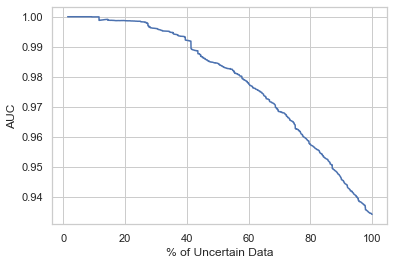

In [48]:
make_performance_uncertainty_plot(y_test.values.astype(int), preds, uncertainties, 'AUC', performance_fn=roc_auc_score)

In [49]:
from scipy.stats import entropy

entropy(preds[None, :])

array([0., 0., 0., ..., 0., 0., 0.], dtype=float32)

In [34]:
uncertainty_entropy = -1 * (preds * np.log(preds) + (1-preds) * np.log(1-preds))

2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0.
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.ttf) normal normal bold normal>) = 10.335
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'DejaVu Serif Display' (DejaVuSerifDisplay.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'DejaVu Sans Display' (DejaVuSansDisplay.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'cmsy10' (cmsy10.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'cmtt10' (cmtt10.ttf) normal normal 400 normal>

2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Luxi Serif' (luxirr.ttf) normal normal regular normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Gurmukhi MN' (Gurmukhi MN.ttc) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Luxi Mono' (luximr.ttf) normal normal regular normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'LingWai SC' (LingWaiSC-Medium.otf) normal normal medium normal>) = 10.145
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Sinhala Sangam MN' (Sinhala Sangam MN.ttc) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Montserrat ExtraBold' (Montserrat-ExtraBold.ttf) normal normal bold norma

2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'PCMyungjo' (PCmyoungjo.ttf) normal normal regular normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS Italic.ttf) italic normal 400 normal>) = 11.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Regular.otf) normal normal regular normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Telugu Sangam MN' (Telugu Sangam MN.ttc) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Apple SD Gothic Neo' (AppleSDGothicNeo.ttc) normal normal regular normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF Compact Text' (SFCompa

2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Sathu' (Sathu.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Comic Sans MS' (Comic Sans MS.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'System Font' (SFNSDisplay-HeavyItalic.otf) italic normal heavy normal>) = 11.43
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Avenir' (Avenir.ttc) normal normal book normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Songti SC' (Songti.ttc) normal normal black normal>) = 10.525
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Al Tarikh' (Al Tarikh.ttc) normal normal regular normal>) = 10.05
2019-07-06 13:42:50: matplotl

2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Montserrat ExtraLight' (Montserrat-ExtraLightItalic.ttf) italic normal light normal>) = 11.24
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'System Font' (SFNSText.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Chalkboard SE' (ChalkboardSE.ttc) normal normal light normal>) = 10.24
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Serto Batnan' (SyrCOMBatnan.otf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'PT Serif' (PTSerif.ttc) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Iowan Old Style' (Iowan Old Style.ttc) normal normal roman norm

2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Kailasa' (Kailasa.ttc) normal normal regular normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Bitstream Vera Serif' (VeraSeBd.ttf) normal normal bold normal>) = 10.335
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF Compact Text' (SFCompactText-MediumItalic.otf) italic normal medium normal>) = 11.145
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W5.ttc) normal normal 700 normal>) = 10.335
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Times New Roman' (Times New Roman Bold Italic.ttf) italic normal roman normal>) = 11.145
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Webdings' (Webdings.ttf) normal

2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W6.ttc) normal normal 700 normal>) = 10.335
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF Compact Rounded' (SFCompactRounded-Medium.otf) normal normal medium normal>) = 10.145
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Damascus' (Damascus.ttc) normal normal regular normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Apple Chancery' (Apple Chancery.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'YuKyokasho Yoko' (Kyokasho.ttc) normal normal medium normal>) = 10.145
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Bitstream Vera Sans Mono' (VeraMoIt.ttf) oblique 

2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Bodoni 72 Smallcaps' (Bodoni 72 Smallcaps Book.ttf) normal normal book normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Avenir Next Condensed' (Avenir Next Condensed.ttc) normal normal bold condensed>) = 10.535
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W7.ttc) normal normal 700 normal>) = 10.335
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'SignPainter' (SignPainter.ttc) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Montserrat Medium' (Montserrat-MediumItalic.ttf) italic normal medium normal>) = 11.145
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Oriya MN' (Or

2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'STHeiti' (STHEITI.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Tsukushi B Round Gothic' (TsukushiBMaruGothic.ttc) normal normal regular normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Bodoni 72' (Bodoni 72.ttc) normal normal book normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Roboto Light' (Roboto-LightItalic.ttf) italic normal light normal>) = 11.24
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Semibold.otf) normal normal semibold condensed>) = 10.44
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Ayuthaya' (Ayuthaya.ttf) n

2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Bodoni Ornaments' (Bodoni Ornaments.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'AppleMyungjo' (AppleMyungjo.ttf) normal normal regular normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Microsoft Sans Serif' (Microsoft Sans Serif.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Luxi Serif' (luxirri.ttf) oblique normal 400 normal>) = 11.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.Aqua Kana' (AquaKana.ttc) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Baoli SC' (Baoli.ttc) normal normal regular normal>) = 10.05
2

2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'American Typewriter' (AmericanTypewriter.ttc) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Arial' (Arial Bold Italic.ttf) italic normal bold normal>) = 1.335
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W9.ttc) normal normal 700 normal>) = 10.335
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'New Peninim MT' (NewPeninimMT.ttc) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Kaiti SC' (Kaiti.ttc) normal normal regular normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Hoefler Text' (Hoefler Text.ttc) normal normal 400 normal>) = 10.05

2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Montserrat Light' (Montserrat-Light.ttf) normal normal light normal>) = 10.24
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'STIXIntegralsUpD' (STIXIntUpDReg.otf) normal normal regular normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Oriya Sangam MN' (Oriya Sangam MN.ttc) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Luxi Sans' (luxisri.ttf) oblique normal 400 normal>) = 11.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'East Syriac Ctesiphon' (SyrCOMCtesiphon.otf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Yuppy SC' (YuppySC-Regular.otf) normal normal re

2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans-BoldOblique.ttf) oblique normal bold normal>) = 3.335
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBolIta.ttf) italic normal bold normal>) = 11.335
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'cmss10' (cmss10.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-BoldOblique.ttf) oblique normal bold normal>) = 11.335
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'DejaVu Sans Mono' (DejaVuSansMono-Bold.ttf) normal normal bold normal>) = 10.335
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'DejaVu Sans' (DejaVuSans.ttf) normal 

2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Bitstream Vera Sans Mono' (VeraMoBI.ttf) oblique normal bold normal>) = 11.335
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF Compact Text' (SFCompactText-RegularItalic.otf) italic normal 400 normal>) = 11.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Farah' (Farah.ttc) normal normal regular normal>) = 10.05
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Heiti TC' (STHeiti Light.ttc) normal normal light normal>) = 10.24
2019-07-06 13:42:50: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Impact' (Impact.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Serto Mardin' (SyrCOMMardin.otf) normal normal 400 normal>) = 10.05
201

2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Hiragino Mincho ProN' (ヒラギノ明朝 ProN.ttc) normal normal 400 normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W3.ttc) normal normal 400 normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Arial' (Arial.ttf) normal normal 400 normal>) = 0.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Farisi' (Farisi.ttf) normal normal regular normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Light.otf) normal normal light condensed>) = 10.44
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'DIN Alternate' (DIN Alternate Bold.ttf) normal normal bold normal

2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Khmer Sangam MN' (Khmer Sangam MN.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'System Font' (SFNSDisplay-UltralightItalic.otf) italic normal ultralight normal>) = 11.335
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'System Font' (SFNSDisplay-SemiboldItalic.otf) italic normal semibold normal>) = 11.24
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Montserrat' (Montserrat-Bold.ttf) normal normal bold normal>) = 10.335
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'STIXSizeTwoSym' (STIXSizTwoSymReg.otf) normal normal regular normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'LingWai TC' (LingW

2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUniBol.otf) normal normal bold normal>) = 10.335
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'YuGothic' (YuGothic-Medium.otf) normal normal medium normal>) = 10.145
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Arial' (Arial Italic.ttf) italic normal 400 normal>) = 1.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Montserrat Thin' (Montserrat-Thin.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'System Font' (SFNSTextItalic.ttf) italic normal 400 normal>) = 11.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Semibold.otf) normal normal semibold norma

2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Mishafi' (Mishafi.ttf) normal normal regular normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Toppan Bunkyu Midashi Gothic' (ToppanBunkyuMidashiGothicStdN-ExtraBold.otf) normal normal bold normal>) = 10.335
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.Arabic UI Text' (ArabicUIText.ttc) normal normal regular normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'BiauKai' (BiauKai.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'STIXGeneral' (STIXGeneralBol.otf) normal normal bold normal>) = 10.335
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Arial Hebrew' (ArialHB.ttc) normal norm

2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Verdana' (Verdana Italic.ttf) italic normal 400 normal>) = 11.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF NS Rounded' (SFNSRounded.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Comic Sans MS' (Comic Sans MS Bold.ttf) normal normal bold normal>) = 10.335
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'STIXNonUnicode' (STIXNonUni.otf) normal normal regular normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'STIXIntegralsD' (STIXIntDBol.otf) normal normal bold normal>) = 10.335
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Arial Narrow' (Arial Narrow Bold Italic.ttf) italic normal bold 

2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Andale Mono' (Andale Mono.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'HeadLineA' (HeadlineA.ttf) normal normal regular normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'STIXSizeThreeSym' (STIXSizThreeSymBol.otf) normal normal bold normal>) = 10.335
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Roboto Thin' (Roboto-Thin.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF Compact Text' (SFCompactText-Light.otf) normal normal light normal>) = 10.24
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Roboto Thin' (Roboto-ThinItalic.ttf) italic normal 400 norm

2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF NS Display Condensed' (SFNSDisplayCondensed-Black.otf) normal normal black condensed>) = 10.725
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Courier New' (Courier New Italic.ttf) italic normal 400 normal>) = 11.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Bradley Hand' (Bradley Hand Bold.ttf) normal normal bold normal>) = 10.335
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Tahoma' (Tahoma.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Hei' (Hei.ttf) normal normal regular normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF NS Symbols' (SFNSSymbols-Light.otf) normal normal light 

2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Yuanti SC' (Yuanti.ttc) normal normal regular normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Hiragino Sans GB' (Hiragino Sans GB.ttc) normal normal 400 normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Hiragino Sans' (ヒラギノ角ゴシック W0.ttc) normal normal 400 normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Trebuchet MS' (Trebuchet MS.ttf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Bitstream Vera Sans' (VeraBd.ttf) normal normal bold normal>) = 6.335
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF NS Text Condensed' (SFNSTextCondensed-Medium.otf) normal normal me

2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Montserrat' (Montserrat-Italic.ttf) italic normal 400 normal>) = 11.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Luxi Serif' (luxirbi.ttf) oblique normal bold normal>) = 11.335
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Nadeem' (Nadeem.ttc) normal normal regular normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Weibei TC' (WeibeiTC-Bold.otf) normal normal bold normal>) = 10.335
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Montserrat' (Montserrat-BoldItalic.ttf) italic normal bold normal>) = 11.335
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Marker Felt' (MarkerFelt.ttc) normal normal 400 normal>) = 10.05
2019-07-06 13

2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'KufiStandardGK' (KufiStandardGK.ttc) normal normal regular normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font '.SF Compact Display' (SFCompactDisplay-Thin.otf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Serto Jerusalem' (SyrCOMJerusalem.otf) normal normal 400 normal>) = 10.05
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Roboto Medium' (Roboto-MediumItalic.ttf) italic normal medium normal>) = 11.145
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'Toppan Bunkyu Gothic' (ToppanBunkyuGothicPr6N.ttc) normal normal demibold normal>) = 10.24
2019-07-06 13:42:51: matplotlib.font_manager - _findfont_cached - DEBUG - findfont: score(<Font 'DIN Condensed

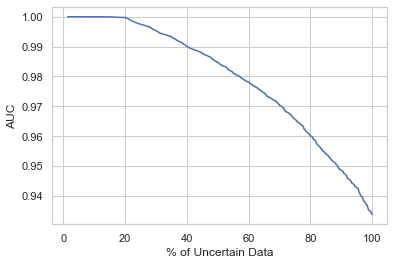

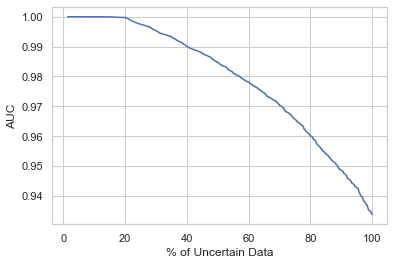

In [36]:
make_performance_uncertainty_plot(y_test.values.astype(int), preds, uncertainty_entropy, 'AUC', performance_fn=roc_auc_score)

In [20]:

from typing import List, Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.figure import Figure
from matplotlib.lines import Line2D
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import learning_curve

from pacmagic.general_utils.constants import *
from pacmagic.modeling.survival_models.kaplan_meier import get_and_fit_kaplan_meier
from pacmagic.visualizing.visualization_settings import *
from pacmagic.visualizing.visualization_utils import set_default_style

# Calibration curve
COLOR_TRAIN_ROC = 'b'
STD_AUC_FIELD = 'std_auc'
MEAN_FPR_FIELD = 'mean_fpr'
MEAN_TPR_FIELD = 'mean_tpr'
COLOR_TEST_ROC = 'orange'
LINE_WIDTH = 2
COLOR_PREDICTIONS = 'green'
PREDICTED_DIST_BINS = 40

LABEL_PERFECTLY_CALIBRATED = 'Perfectly calibrated'
LABEL_PREDICTIONS = 'Predictions'
LABEL_CI = 'Confidence Interval'

Y_PROB_COL = 'y_prob'
Y_TRUE_COL = 'y_true'
Y_CI_UPPER_COL = 'y_ci_upper'
Y_CI_LOWER_COL = 'y_ci_lower'
GROUP_COL = 'group'

set_default_style()

LEGEND_LOCATION_BEST = 'best'
HAZARD_PLOT_X_LABEL = 'time $t$'
HAZARD_PLOT_Y_LABEL = 'Est. probability of survival at t'
STEP_PLACEMENT = 'post'

ACTUAL_END_SCATTER_SIZE = 80
ORDER_IN_FRONT = 1

MARKER_CENSORING = 'o'
MARKER_EVENT = 'D'
SURVIVAL_MARKERSIZE = 10
SURVIVAL_MARKERFACECOLOR = 'grey'
SURVIVAL_LEGEND_COLOR = 'w'

def plot_calibration_curve(y_true, y_prob,
                           y_min: float = 0,
                           y_max: float = 1,
                           n_bins: int = 5,
                           n_std: int = 4,
                           y_std=None,
                           n: int = None,
                           z: float = 1.645,
                           ) -> Figure:
    """Plot the calibration curve. This curve shows if predicted probabilities and observed
    frequencies are inline. For example, if well calibrated 100 observations with y_pred = 0.1
    should contain 10 observation with y_true = 1

    Parameters
    ----------
    y_true : array-like
        Target value of y.
    y_prob : array-like
        Predicted probability values of y.
    y_min : float, optional
        Minimum value of the value axis.
    y_max : float, optional
        Maximum value of the value axis, y_pred > y_max will be maximized to y_max.
    n_bins : int, optional
        Number of bins of the histograms.
    n_std : int, optional
        Number of standard deviations to include.
    y_std: array-like, optional
        If you have a Bayesian standard deviation around your predictions
    n: int, optional
        Number of samples taken (in Bayesian Case)
    z: float, optional
        Z value for confidence interval.

    Returns
    -------
    type: matplotlib.figure.Figure
        A plot

    """

    # Make dataframe with y_true and y_pred
    df_plot = pd.DataFrame(y_prob)
    df_plot.columns = [Y_PROB_COL]
    df_plot[Y_TRUE_COL] = y_true
    if y_std is not None:
        df_plot[Y_CI_UPPER_COL] = y_prob + z * (y_std / n ** 0.5)
        df_plot[Y_CI_LOWER_COL] = y_prob - z * (y_std / n ** 0.5)

    # Initialize plot
#     # Make histogram of predicted probabilities
#     x = df_plot[Y_PROB_COL].values
#     x = np.maximum(np.minimum(x, y_max), y_min)
#     ax1.hist(x, bins=n_bins, color=SKYBLUE_COLOR)

    # Overlay the calibration curve
    mean = df_plot[Y_PROB_COL].mean()
    std = df_plot[Y_PROB_COL].std()

    # Make bins for the calibration
    df_plot[GROUP_COL] = df_plot[Y_PROB_COL].apply(lambda a: np.round((a - mean) / std))
    df_plot[GROUP_COL] = np.minimum(np.maximum(df_plot[GROUP_COL], -n_std), n_std)
    df_plot[GROUP_COL] = df_plot[GROUP_COL].apply(lambda a: mean + std * a)
    df_plot[GROUP_COL] = np.maximum(np.minimum(df_plot[GROUP_COL], y_max), y_min)

    
    df_agg = df_plot.groupby(GROUP_COL)[Y_TRUE_COL, Y_PROB_COL].mean().reset_index()

    y_u = None
    y_l = None

    x = df_agg[Y_PROB_COL]
    y = df_agg[Y_TRUE_COL]

    # Plot the calibration curve
    return x, y
#     plt.plot(x, x, DOT_LINE_STYLE, color=COLOR_NEUTRAL, label=LABEL_PERFECTLY_CALIBRATED)
    
    return fig


In [23]:
coords = [plot_calibration_curve(y_test, preds) for pred in preds]

In [ ]:
plt.figure(figsize=(20, 20))

for coord in coords:
    
    
    plt.plot(coord[0], coord[1])

plt.plot(coords[0][0], coords[0][0])


In [ ]:
uncertainties = bnn.get_uncertainties(X_test_processed)
probabilities = bnn.predict_proba(X_test_processed)[:, 1]
labels = y_test.values

In [ ]:
outputs = bnn.get_raw_outputs(X_test_processed)

In [ ]:
roc_auc_score(labels, probabilities)

In [ ]:
sns.distplot(uncertainties)

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(probabilities[labels == 1], uncertainties[labels == 1], label='Readmissions', c='red', marker='.')
plt.scatter(probabilities[labels == 0], uncertainties[labels == 0], label='No Readmissions', c='blue', 
            marker='.', alpha=.1)

plt.legend()
plt.ylabel('STD')
plt.xlabel('Prediction')

In [ ]:
make_performance_uncertainty_plot(labels, probabilities, uncertainties, 'AUC', performance_fn=roc_auc_score)

In [72]:


p = np.random.rand(10)

In [73]:
y = np.random.randint(0, 2, 10)

In [74]:
y

array([0, 1, 0, 1, 1, 1, 0, 1, 0, 0])

In [75]:
p

array([0.10830973, 0.2336022 , 0.74683317, 0.94531852, 0.194421  ,
       0.39262395, 0.18811409, 0.197653  , 0.30757639, 0.98352207])

In [76]:
p[p > p[0]]

array([0.2336022 , 0.74683317, 0.94531852, 0.194421  , 0.39262395,
       0.18811409, 0.197653  , 0.30757639, 0.98352207])

In [77]:
y_ = y[p < p[0]].sum() / len(y)

In [83]:
def bce(y, p):
    return -1 * (y * np.log(p) + (1-y) * np.log(1-p))

In [85]:
p[-1]

0.9835220727859519

In [90]:
y[p < p[-1]].sum() / len(y)

bce(y[p < p[-1]].sum() / len(y), 0.5)

0.6931471805599453

In [89]:
p[-1]

0.9835220727859519

In [535]:
from sklearn.datasets import make_moons

In [573]:
x, y = make_moons(n_samples=5000)

In [574]:
x = torch.from_numpy(x).float()
y = torch.from_numpy(y).float()

In [668]:
class NN(nn.Module):
    def __init__(self):
        super(NN, self).__init__()
        self.linear1 = nn.Linear(2, 64)
        self.linear_conf = nn.Linear(64, 1)
        self.linear = nn.Linear(64, 1)
        
    def forward(self, x):
        x = self.linear1(x)
        
        y_conf = torch.sigmoid(self.linear_conf(x))
        y = torch.sigmoid(self.linear(x))
        return y

In [689]:
model = NN()

In [733]:
class QLC(nn.Module):
    def __init__(self):
        super(QLC, self).__init__()
    
    def forward(self, y_score, y):
        mask = y_score < y_score.unsqueeze(-1)
#         mask_over = y_score > y_score.unsqueeze(-1)
        
#         for i in range(len(mask)):
#             print(y[mask[i]])
        
#     print(y_score.shape,)
        means = torch.Tensor([y[mask[i]].mean() for i in range(len(mask))])
        
#         means = torch.Tensor([y[mask[i]].sum() / mask.shape[1] for i in range(len(mask))])

        
                
#         print(means)
#         print(y_score)
        print((y_score < y_score.max()).float().mean() - y_score.max())
        print((y_score < y_score.median()).float().mean() - y_score.median())

        
        ls = torch.nn.functional.mse_loss(y_score[~torch.isnan(means)], means[~torch.isnan(means)], reduction='none')
                
        return (0.01 * ls).sum(), 0

In [734]:
loss_fn = QLC()

In [735]:
y_ = model(x).squeeze(-1)

In [736]:
y.shape

torch.Size([5000])

In [737]:
loss = loss_fn(y_, y)

tensor(0.5506, grad_fn=<SubBackward0>)
tensor(0.4071, grad_fn=<SubBackward0>)


In [738]:
print(loss)

(tensor(0.0406, grad_fn=<SumBackward0>), 0)


In [739]:
loss.backward()

AttributeError: 'tuple' object has no attribute 'backward'

In [740]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

In [741]:
for i in range(1000):
    y_ = model(x).squeeze(-1)
    c_loss, bce_loss = loss_fn(y_, y)
    
#     print(c_loss, bce_loss)
    loss = c_loss + 0.1 * bce_loss
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if i % 10 == 0:
        print(i)
        print(loss)

tensor(0.5506, grad_fn=<SubBackward0>)
tensor(0.4071, grad_fn=<SubBackward0>)
0
tensor(0.0406, grad_fn=<AddBackward0>)
tensor(0.4386, grad_fn=<SubBackward0>)
tensor(0.3776, grad_fn=<SubBackward0>)
tensor(0.4864, grad_fn=<SubBackward0>)
tensor(0.3856, grad_fn=<SubBackward0>)
tensor(0.5433, grad_fn=<SubBackward0>)
tensor(0.3974, grad_fn=<SubBackward0>)
tensor(0.5701, grad_fn=<SubBackward0>)
tensor(0.4032, grad_fn=<SubBackward0>)


KeyboardInterrupt: 

In [ ]:
for i in range(len(y_)):
    print(y_[i])
    print(y[y_ < y[i]].sum() / len(y) - y[i])

In [563]:
y[y_ < y_.max()].sum() / len(y) - y_.max()

tensor(-0.4363, grad_fn=<SubBackward0>)

In [586]:
roc_auc_score(y.detach().numpy(), y_.detach().numpy())

0.94865248

In [587]:
from pacmagic.visualizing.model_plots import plot_calibration_curve

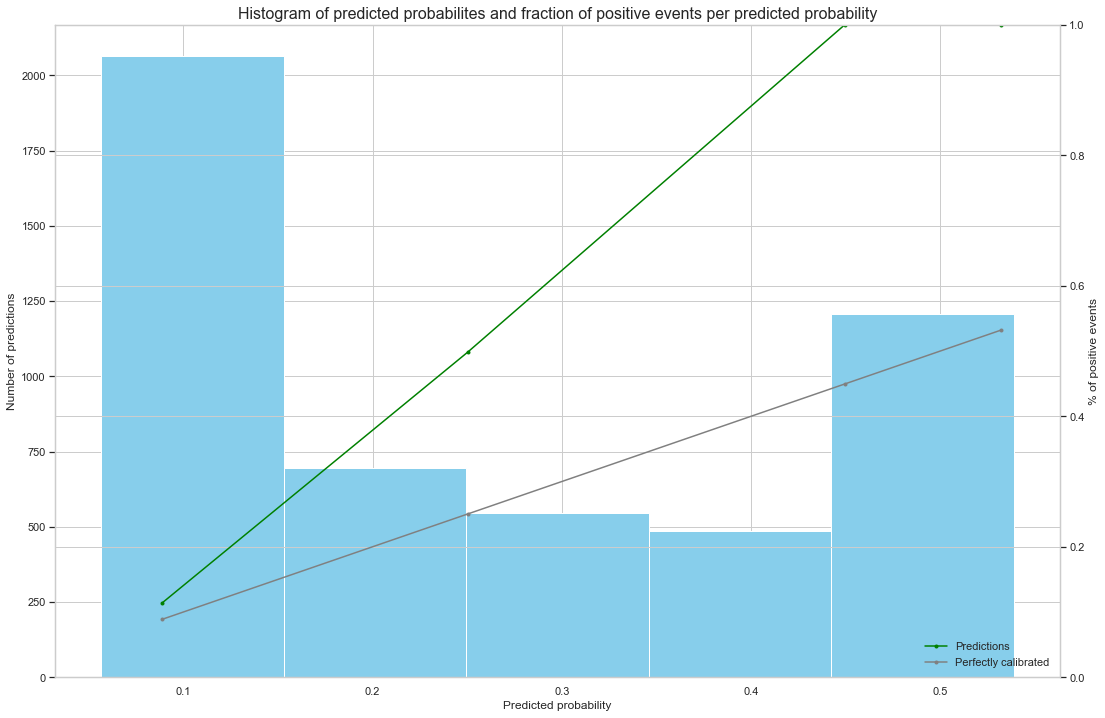

In [588]:
plot_calibration_curve(y,  y_.detach().numpy())

In [389]:
y[y_ < y_.max()].mean() - y_.max()

tensor(0.0539, grad_fn=<SubBackward0>)

In [331]:
y[y_ < y_.max()]

tensor(0.4949)

In [172]:
y_ < y_[0]

tensor([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1], dtype=torch.uint8)

In [175]:
(y_ < y_.unsqueeze(-1)).float().mean(-1)

tensor([0.5100, 0.6000, 0.5000, 0.7200, 0.7800, 0.2400, 0.4000, 0.1800, 0.4400,
        0.8300, 0.7300, 0.5200, 0.0400, 0.9000, 0.0200, 0.2700, 0.9200, 0.8200,
        0.4900, 0.7900, 0.2900, 0.1600, 0.1100, 0.3800, 0.0100, 0.8500, 0.4300,
        0.8900, 0.9900, 0.7000, 0.2600, 0.0500, 0.7400, 0.6800, 0.5800, 0.1900,
        0.1400, 0.2000, 0.8800, 0.3400, 0.6100, 0.0600, 0.4100, 0.2500, 0.3200,
        0.5600, 0.5500, 0.6500, 0.1200, 0.1500, 0.0000, 0.6700, 0.3000, 0.6400,
        0.8700, 0.3300, 0.9400, 0.7100, 0.6200, 0.8000, 0.2200, 0.1000, 0.5300,
        0.9300, 0.6900, 0.4800, 0.5400, 0.2800, 0.8400, 0.4200, 0.2300, 0.4600,
        0.3600, 0.3500, 0.0900, 0.5900, 0.7500, 0.0700, 0.1700, 0.9600, 0.6600,
        0.2100, 0.7700, 0.9100, 0.7600, 0.9700, 0.9800, 0.0300, 0.0800, 0.5700,
        0.1300, 0.9500, 0.3900, 0.3100, 0.6300, 0.4500, 0.8600, 0.8100, 0.3700,
        0.4700])

In [168]:
(y_ < y_[0]).float().mean()

tensor(0.5100)

In [180]:
y[(y_ < y_[0])]

tensor([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
        1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [332]:
y[(y_ < y_.unsqueeze(-1))] - y_

IndexError: too many indices for tensor of dimension 1

In [191]:
y[(y_ < (y_ < y_.unsqueeze(-1)).float().mean(-1)).unsqueeze(-1)]

IndexError: too many indices for tensor of dimension 1

In [194]:
y_.shape, y_.unsqueeze(-1).shape

(torch.Size([100]), torch.Size([100, 1]))

In [201]:
(y_ < y_.unsqueeze(-1)).float().mean(-1)

tensor([0.5100, 0.6000, 0.5000, 0.7200, 0.7800, 0.2400, 0.4000, 0.1800, 0.4400,
        0.8300, 0.7300, 0.5200, 0.0400, 0.9000, 0.0200, 0.2700, 0.9200, 0.8200,
        0.4900, 0.7900, 0.2900, 0.1600, 0.1100, 0.3800, 0.0100, 0.8500, 0.4300,
        0.8900, 0.9900, 0.7000, 0.2600, 0.0500, 0.7400, 0.6800, 0.5800, 0.1900,
        0.1400, 0.2000, 0.8800, 0.3400, 0.6100, 0.0600, 0.4100, 0.2500, 0.3200,
        0.5600, 0.5500, 0.6500, 0.1200, 0.1500, 0.0000, 0.6700, 0.3000, 0.6400,
        0.8700, 0.3300, 0.9400, 0.7100, 0.6200, 0.8000, 0.2200, 0.1000, 0.5300,
        0.9300, 0.6900, 0.4800, 0.5400, 0.2800, 0.8400, 0.4200, 0.2300, 0.4600,
        0.3600, 0.3500, 0.0900, 0.5900, 0.7500, 0.0700, 0.1700, 0.9600, 0.6600,
        0.2100, 0.7700, 0.9100, 0.7600, 0.9700, 0.9800, 0.0300, 0.0800, 0.5700,
        0.1300, 0.9500, 0.3900, 0.3100, 0.6300, 0.4500, 0.8600, 0.8100, 0.3700,
        0.4700])

In [204]:
y[(y_ < y_[0])]

tensor([1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 1., 0.,
        1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [216]:
y.unsqueeze(-1).repeat(1, 100)[y_ < y_.unsqueeze(-1)]

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [208]:
(y_ < y_.unsqueeze(-1)).shape

torch.Size([100, 100])

In [211]:
y.unsqueeze(-1).repeat(1, 100)

tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        [1., 1., 1.,  ..., 1., 1., 1.],
        ...,
        [1., 1., 1.,  ..., 1., 1., 1.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])

In [219]:
y.unsqueeze(-1).repeat(1, 100).shape

torch.Size([100, 100])

In [221]:
(y_ < y_.unsqueeze(-1)).shape

torch.Size([100, 100])

In [224]:
y.unsqueeze(-1).repeat(1, 100)[(y_ < y_.unsqueeze(-1))]

tensor([0., 0., 0.,  ..., 0., 0., 0.])

In [226]:
(y_ < y_.unsqueeze(-1))[0]

tensor([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1], dtype=torch.uint8)

In [227]:
y_ < y_[0]

tensor([0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
        1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
        1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1,
        0, 0, 1, 1], dtype=torch.uint8)

In [228]:
y.unsqueeze(0).repeat(1, 100)

tensor([[0., 1., 1.,  ..., 1., 0., 0.]])

In [236]:
mask = y_ < y_.unsqueeze(-1)

means = torch.Tensor([y[mask[i]].mean() for i in range(len(mask))])

In [250]:
means

tensor([0.2353, 0.2667, 0.2200, 0.3056, 0.3590, 0.0000, 0.1500, 0.0000, 0.1818,
        0.3976, 0.3151, 0.2308, 0.0000, 0.4444, 0.0000, 0.0000, 0.4565, 0.3902,
        0.2245, 0.3671, 0.0000, 0.0000, 0.0000, 0.1316, 0.0000, 0.4118, 0.1860,
        0.4382, 0.4949, 0.2857, 0.0000, 0.0000, 0.3243, 0.2941, 0.2586, 0.0000,
        0.0000, 0.0000, 0.4318, 0.0882, 0.2787, 0.0000, 0.1707, 0.0000, 0.0625,
        0.2500, 0.2545, 0.2769, 0.0000, 0.0000,    nan, 0.2836, 0.0000, 0.2812,
        0.4253, 0.0606, 0.4681, 0.2958, 0.2742, 0.3750, 0.0000, 0.0000, 0.2453,
        0.4624, 0.2899, 0.2083, 0.2407, 0.0000, 0.4048, 0.1667, 0.0000, 0.1957,
        0.1111, 0.0857, 0.0000, 0.2712, 0.3333, 0.0000, 0.0000, 0.4792, 0.2879,
        0.0000, 0.3506, 0.4505, 0.3421, 0.4845, 0.4898, 0.0000, 0.0000, 0.2632,
        0.0000, 0.4737, 0.1538, 0.0323, 0.2857, 0.2000, 0.4186, 0.3827, 0.1351,
        0.2128])

In [431]:
y_

tensor([0.2845, 0.2016, 0.0843,  ..., 0.1151, 0.0414, 0.3620],
       grad_fn=<SqueezeBackward1>)

In [433]:
y > y_.max()

tensor([1, 0, 0,  ..., 1, 0, 1], dtype=torch.uint8)

In [441]:
y[(y_ > y_.max())].sum()

tensor(0.)

In [589]:
y_.max()

tensor(0.5390, grad_fn=<MaxBackward1>)

In [593]:
(y_ < y_.max()).float().mean() - y_.max()

tensor(0.4606, grad_fn=<SubBackward0>)